In [1]:
import pandas as pd

### **Exercise1:**

Give students in the `example.csv` file a bonus of 5 for all the courses. Find a way to replace all the values that are now greater than 30 by 30. Save the new data to a file. Make a plot with histograms for every course in the example file.

In [36]:
# Load the data from the file into a DataFrame
df = pd.read_csv("example.csv")

# Give the students a bonus of 5 for all the courses
df[df.columns[1:]] += 5

# Replace all the values that are now greater than 30 by 30
df[['course1', 'course2', 'course3', 'course4']] = df[['course1', 'course2', 'course3', 'course4']].clip(upper=30)
df.to_csv("example+5.csv")
df

,name,course1,course2,course3,course4
0,Marie,29,23,30,25
1,John,23,30,30,30
2,Kati,26,29,30,30
3,Olaf,30,30,30,30
4,Mark,29,30,30,26
5,Olga,28,30,30,30
6,Jean,23,30,30,29
7,Alex,24,25,30,30
8,Pier,29,30,28,30
9,Bennet,29,30,30,30


In [28]:
# longer way to do it

df.loc[:,df.columns != 'name'] = df.loc[:,df.columns != 'name'] + 5
df

,name,course1,course2,course3,course4
0,Marie,39,33,40,35
1,John,33,40,40,40
2,Kati,36,39,40,40
3,Olaf,40,40,40,40
4,Mark,39,40,40,36
5,Olga,38,40,40,40
6,Jean,33,40,40,39
7,Alex,34,35,40,40
8,Pier,39,40,38,40
9,Bennet,39,40,40,40


In [49]:
df = pd.read_csv("example.csv")
df.loc[:,df.columns != 'name'] = df.loc[:,df.columns != 'name'] + 5
for col in df.columns[1:]:
    df.loc[df[col] > 30, col] = 30
df


,name,course1,course2,course3,course4
0,Marie,29,23,30,25
1,John,23,30,30,30
2,Kati,26,29,30,30
3,Olaf,30,30,30,30
4,Mark,29,30,30,26
5,Olga,28,30,30,30
6,Jean,23,30,30,29
7,Alex,24,25,30,30
8,Pier,29,30,28,30
9,Bennet,29,30,30,30


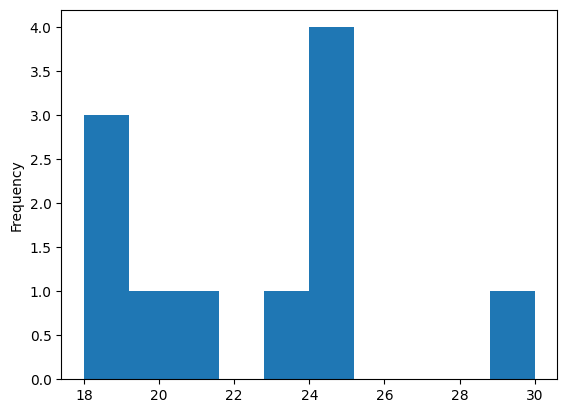

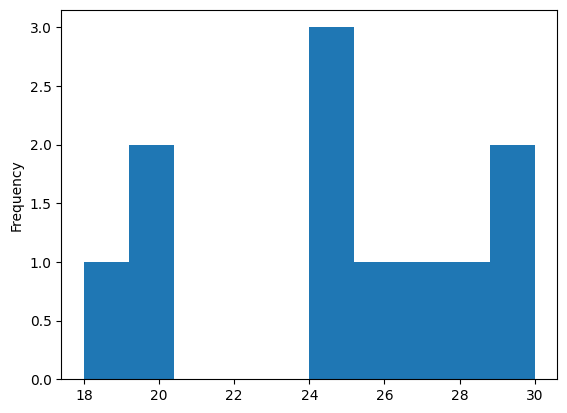

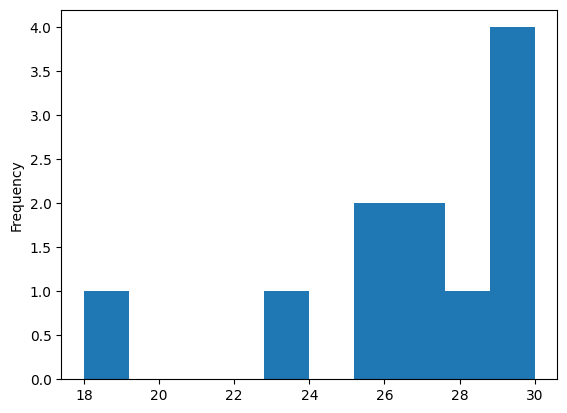

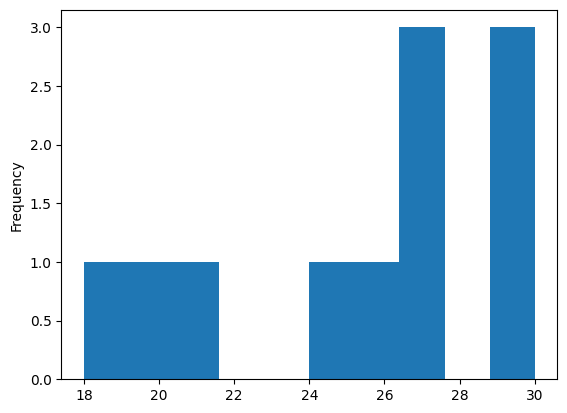

In [8]:
df = pd.read_csv("example.csv")

from matplotlib import pyplot as plt
df.columns[1]
for i in range(1, len(df.columns)):
    df[df.columns[i]].plot(kind = 'hist')
    plt.show()

### **Exercise2:**

 - Read in the `cars.csv` file as a dataframe
 - Remove the row with the index 3, which contains a quote in the Model column.
 - Add a new column called Price with the following values: [8000, 6500, 7000, 6800, 7500, 7300, 7000, 9000, 6500, 7800]
 - Replace all values in the Make column that are Ford with Toyota.
 - Find the average Length of all the vehicles.
 - Find the median Price of all the vehicles.
 - Create a new dataframe that only contains the rows where the Price is greater than 7000.
 - Create a new dataframe that only contains the rows where the Make is Toyota and the Price is greater than 7000.
 - Sort the dataframe in descending order by the Price column.


In [100]:
import pandas as pd
df = pd.read_csv("cars.csv")
df

,Year,Make,Model,Length
0,1997,Ford,E350,2.34
1,2000,Mercury,Cougar,2.38
2,1993,Chevrolet,"Venture ""Extended Edition""",3.20
3,1999,Jeep,Grand Cherokee,2.56
4,1998,Dodge,Intrepid,3.01
5,1997,Ford,E350,2.34
6,1999,Ford,E350,2.34
7,1996,Ford,Mustang,2.37
8,2000,Ford,Mustang,2.34
9,1997,Ford,Taurus,2.34


In [101]:
df.drop(labels = 2, axis = 0, inplace=False)
df

,Year,Make,Model,Length
0,1997,Ford,E350,2.34
1,2000,Mercury,Cougar,2.38
2,1993,Chevrolet,"Venture ""Extended Edition""",3.20
3,1999,Jeep,Grand Cherokee,2.56
4,1998,Dodge,Intrepid,3.01
5,1997,Ford,E350,2.34
6,1999,Ford,E350,2.34
7,1996,Ford,Mustang,2.37
8,2000,Ford,Mustang,2.34
9,1997,Ford,Taurus,2.34


In [102]:
df['Price'] = [8000, 6500, 7000, 6800, 7500, 7300, 7000, 9000, 6500, 7800]
df

,Year,Make,Model,Length,Price
0,1997,Ford,E350,2.34,8000
1,2000,Mercury,Cougar,2.38,6500
2,1993,Chevrolet,"Venture ""Extended Edition""",3.20,7000
3,1999,Jeep,Grand Cherokee,2.56,6800
4,1998,Dodge,Intrepid,3.01,7500
5,1997,Ford,E350,2.34,7300
6,1999,Ford,E350,2.34,7000
7,1996,Ford,Mustang,2.37,9000
8,2000,Ford,Mustang,2.34,6500
9,1997,Ford,Taurus,2.34,7800


In [103]:
# df['Make']=='Ford' :prendi le righe che nella colonna Make hanno scritto Ford
# , ['Make'] :prendi la colonna Make
# df.loc[df['Make']=='Ford', ['Make']] :prendi la colonna Make solo dove c'è scrito Ford... e poi sostituisci

df.loc[df['Make']=='Ford', 'Make'] = 'Toyota'
# df['Make'] = df['Make'].replace('Ford', 'Toyota') #alternativa
df

,Year,Make,Model,Length,Price
0,1997,Toyota,E350,2.34,8000
1,2000,Mercury,Cougar,2.38,6500
2,1993,Chevrolet,"Venture ""Extended Edition""",3.20,7000
3,1999,Jeep,Grand Cherokee,2.56,6800
4,1998,Dodge,Intrepid,3.01,7500
5,1997,Toyota,E350,2.34,7300
6,1999,Toyota,E350,2.34,7000
7,1996,Toyota,Mustang,2.37,9000
8,2000,Toyota,Mustang,2.34,6500
9,1997,Toyota,Taurus,2.34,7800


In [104]:
import pandas as pd
df = pd.read_csv("cars.csv")
df['Price'] = [8000, 6500, 7000, 6800, 7500, 7300, 7000, 9000, 6500, 7800]

print(df.loc[:,'Length'].mean())
print(df.loc[:,'Price'].median())

2.522
7150.0


In [105]:
import pandas as pd
df = pd.read_csv("cars.csv")
df['Price'] = [8000, 6500, 7000, 6800, 7500, 7300, 7000, 9000, 6500, 7800]
df
new_df = df.loc[df['Price']>7000, :]
new_df

,Year,Make,Model,Length,Price
0,1997,Ford,E350,2.34,8000
4,1998,Dodge,Intrepid,3.01,7500
5,1997,Ford,E350,2.34,7300
7,1996,Ford,Mustang,2.37,9000
9,1997,Ford,Taurus,2.34,7800


In [108]:
import pandas as pd
df = pd.read_csv("cars.csv")
df['Price'] = [8000, 6500, 7000, 6800, 7500, 7300, 7000, 9000, 6500, 7800]
df
new_df = df.loc[(df.Price>7000) & (df.Make=='Ford'), :]
# new_df = df.loc[df['Price']>7000, :].loc[df['Make']=='Ford', :] # alternativa
new_df

,Year,Make,Model,Length,Price
0,1997,Ford,E350,2.34,8000
5,1997,Ford,E350,2.34,7300
7,1996,Ford,Mustang,2.37,9000
9,1997,Ford,Taurus,2.34,7800


In [88]:
new_df.sort_values(by=['Price'], ascending= False, inplace= True)
new_df

,Year,Make,Model,Length,Price
7,1996,Ford,Mustang,2.37,9000
0,1997,Ford,E350,2.34,8000
9,1997,Ford,Taurus,2.34,7800
5,1997,Ford,E350,2.34,7300


In [109]:
import pandas as pd
df = pd.read_csv("cars.csv")
df


,Year,Make,Model,Length
0,1997,Ford,E350,2.34
1,2000,Mercury,Cougar,2.38
2,1993,Chevrolet,"Venture ""Extended Edition""",3.20
3,1999,Jeep,Grand Cherokee,2.56
4,1998,Dodge,Intrepid,3.01
5,1997,Ford,E350,2.34
6,1999,Ford,E350,2.34
7,1996,Ford,Mustang,2.37
8,2000,Ford,Mustang,2.34
9,1997,Ford,Taurus,2.34


In [111]:
df.groupby('Make')['Year'].min()

Make
Chevrolet    1993
Dodge        1998
Ford         1996
Jeep         1999
Mercury      2000
Name: Year, dtype: int64

In [115]:
df.groupby('Make')['Length'].agg(['min','max'])

,min,max
Make,,
Chevrolet,3.20,3.20
Dodge,3.01,3.01
Ford,2.34,2.37
Jeep,2.56,2.56
Mercury,2.38,2.38
